In [5]:
import requests
import csv
import pandas
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

def parse_resumes(search_text):
    fields=[["name","salary","specialization","sex","age","experience","employment","citizenship"]]
    for i in range(1):
        if i == 0 : URL = "https://hh.kz/search/resume?text=" + search_text + "&area=40&currency_code=KZT&ored_clusters=true&order_by=relevance&logic=normal&pos=full_text&exp_period=all_time&items_on_page=20"
        else: URL = "https://hh.kz/search/resume?text=" + search_text + "&area=40&currency_code=KZT&ored_clusters=true&order_by=relevance&logic=normal&pos=full_text&exp_period=all_time&items_on_page=20 &page=" + str(i + 1)
        

        page = requests.get(URL, headers={'User-Agent': 'Custom'})
        soup = BeautifulSoup(page.content, "html.parser")

        job_elements = soup.find_all(class_ = "serp-item")

        for element in job_elements:
            Aelement = element.find(class_ = "serp-item__title")
            link = Aelement.get('href')

            newUrl = "https://hh.kz/" + link
            newPage = requests.get(newUrl, headers={'User-Agent': 'Custom'})
            newsoup = BeautifulSoup(newPage.content, "html.parser")
            
            title = element.find(class_ = "serp-item__title").get_text()
            Specialization = "Specialization not found :_("
            Salary = 0
            Age = "Age not found :_("
            EmpAndWork = []
            Exp = "Experince not found"
            Cs = "Citizenship not found"
            sex = "Sex not found"

            """ Finds specialization"""
            SpecializationElement = newsoup.find(class_ = "resume-block__specialization")
            if SpecializationElement is not None: Specialization = SpecializationElement.get_text() 

            """ Finds salary"""
            SalaryElement = newsoup.find(class_ = "resume-block__salary")
            if SalaryElement is not None:
                temp = ""
                for char in SalaryElement.get_text():
                    if '0' <= char <= '9':
                        temp += char
                Salary = int(temp)

            """ Finds Age"""
            AgeElement = element.find(class_ = "resume-search-item__fullname")
            if AgeElement is not None: Age = AgeElement.get_text()
            
            """ Finds employment and work schedule"""
            EmpElement = newsoup.find(class_ = "resume-block-container")
            
            if EmpElement is not None: Found = EmpElement.find_all("p")
            for EW in Found:
                if EW is not None:
                    EmpAndWork += EW.get_text()
                    EmpAndWork += "\n"
            EmpAndWork = ''.join(EmpAndWork)

            """ Finds years and month exp"""
            ExpElement = newsoup.find(class_ = "resume-block__title-text resume-block__title-text_sub")
            if ExpElement is not None: Exp = ExpElement.get_text()

            """ Finds citizenship"""
            CsElement = newsoup.find(lambda tag: tag.name == "p" and "Гражданство" in tag.text)
            if CsElement is None: CsElement = newsoup.find(lambda tag: tag.name == "p" and "Citizenship" in tag.text)
            if CsElement is not None: Cs = CsElement.get_text()

            """ Finds sex"""
            sexElement = newsoup.find(lambda tag: tag.name == "span" and (("Мужчина" in tag.text) or ("Женщина" in tag.text) or ("Male" in tag.text) or ("Female" in tag.text)))
            if sexElement is not None: sex = sexElement.get_text()

            field = [  title,
                        Salary,
                        Specialization,
                        sex,
                        Age,
                        Exp,
                        EmpAndWork,
                        Cs]

            fields.append(field)
    
    return fields
            
    
if __name__ == "__main__":
    search_text = input()

    with open("resumes.csv",'w', newline='', encoding="utf-8") as csvf:
        writer = csv.writer(csvf)
        writer.writerows(parse_resumes("java"))

pandas.read_csv('resumes.csv',delimiter=',')
reader = pandas.read_csv('resumes.csv',delimiter=',')
reader.sort_values(["salary","age","experience","name"])

,name,salary,specialization,sex,age,experience,employment,citizenship
17,Java Spring Разработчик,0,"Программист, разработчик",Мужчина,21 год,Опыт работы 2 года 3 месяца,"Занятость: стажировка, волонтерство, частичная...",Гражданство: Казахстан
6,Backend разработчик(Java),0,"Программист, разработчик",Мужчина,21 год,Опыт работы 2 года 5 месяцев,"Занятость: стажировка, волонтерство, частичная...",Гражданство: Казахстан
12,Java Back end developer,0,"Программист, разработчик",Мужчина,21 год,Опыт работы 7 месяцев,Занятость: полная занятость\nГрафик работы: по...,Гражданство: Казахстан
5,Java Backend Developer,0,"Programmer, developer",Male,22 года,Work experience 1 year 5 months,"Employment: part time, project work, full time...",Citizenship: Kazakhstan
16,Junior+/Middle Java разработчик,0,"Программист, разработчик",Мужчина,22 года,Опыт работы 1 год 1 месяц,"Занятость: частичная занятость, проектная рабо...",Гражданство: Кыргызстан
19,"Java-разработчик, Full-stack",0,"Программист, разработчик",Мужчина,22 года,Опыт работы 2 года 3 месяца,"Занятость: частичная занятость, полная занятос...",Гражданство: Казахстан
9,Java-разработчик,0,"Программист, разработчик",Мужчина,23 года,Опыт работы 1 год 6 месяцев,"Занятость: частичная занятость, полная занятос...",Гражданство: Казахстан
11,Java-разработчик,0,"Программист, разработчик",Мужчина,27 лет,Опыт работы 4 года 9 месяцев,"Занятость: частичная занятость, проектная рабо...",Гражданство: Казахстан
18,Java-разработчик,0,"Programmer, developer",Male,29 лет,Work experience 4 years 8 months,Employment: full time\nWork schedule: remote w...,Citizenship: Kazakhstan
14,Java-программист,0,"Программист, разработчик",Мужчина,33 года,Опыт работы 10 лет 10 месяцев,Занятость: полная занятость\nГрафик работы: по...,Гражданство: Казахстан


In [6]:
import pandas
pandas.read_csv('resumes.csv',delimiter=',')
reader = pandas.read_csv('resumes.csv',delimiter=',')
reader.sort_values(["salary","age","experience","name"])

,name,salary,specialization,sex,age,experience,employment,citizenship
17,Java Spring Разработчик,0,"Программист, разработчик",Мужчина,21 год,Опыт работы 2 года 3 месяца,"Занятость: стажировка, волонтерство, частичная...",Гражданство: Казахстан
6,Backend разработчик(Java),0,"Программист, разработчик",Мужчина,21 год,Опыт работы 2 года 5 месяцев,"Занятость: стажировка, волонтерство, частичная...",Гражданство: Казахстан
12,Java Back end developer,0,"Программист, разработчик",Мужчина,21 год,Опыт работы 7 месяцев,Занятость: полная занятость\nГрафик работы: по...,Гражданство: Казахстан
5,Java Backend Developer,0,"Programmer, developer",Male,22 года,Work experience 1 year 5 months,"Employment: part time, project work, full time...",Citizenship: Kazakhstan
16,Junior+/Middle Java разработчик,0,"Программист, разработчик",Мужчина,22 года,Опыт работы 1 год 1 месяц,"Занятость: частичная занятость, проектная рабо...",Гражданство: Кыргызстан
19,"Java-разработчик, Full-stack",0,"Программист, разработчик",Мужчина,22 года,Опыт работы 2 года 3 месяца,"Занятость: частичная занятость, полная занятос...",Гражданство: Казахстан
9,Java-разработчик,0,"Программист, разработчик",Мужчина,23 года,Опыт работы 1 год 6 месяцев,"Занятость: частичная занятость, полная занятос...",Гражданство: Казахстан
11,Java-разработчик,0,"Программист, разработчик",Мужчина,27 лет,Опыт работы 4 года 9 месяцев,"Занятость: частичная занятость, проектная рабо...",Гражданство: Казахстан
18,Java-разработчик,0,"Programmer, developer",Male,29 лет,Work experience 4 years 8 months,Employment: full time\nWork schedule: remote w...,Citizenship: Kazakhstan
14,Java-программист,0,"Программист, разработчик",Мужчина,33 года,Опыт работы 10 лет 10 месяцев,Занятость: полная занятость\nГрафик работы: по...,Гражданство: Казахстан


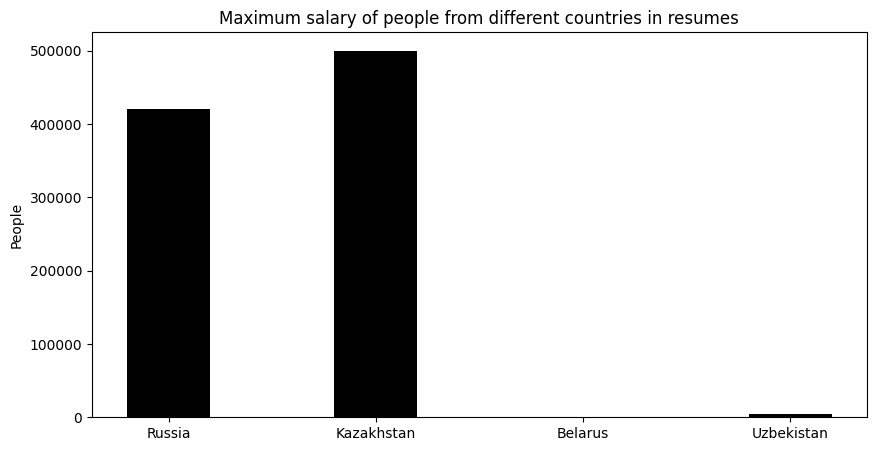

In [7]:
data = {'Russia':reader.loc[reader.citizenship=="Гражданство: Россия"].salary.max() * 6,
       'Kazakhstan':reader.loc[reader.citizenship=="Гражданство: Казахстан"].salary.max(),
       'Belarus':reader.loc[reader.citizenship=="Гражданство: Беларусь"].salary.max(),
       'Uzbekistan':reader.loc[reader.citizenship=="Гражданство: Узбекистан"].salary.max()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
plt.bar(courses, values, color ='black',
        width = 0.4)
 

plt.ylabel("People")
plt.title("Maximum salary of people from different countries in resumes")
plt.show()

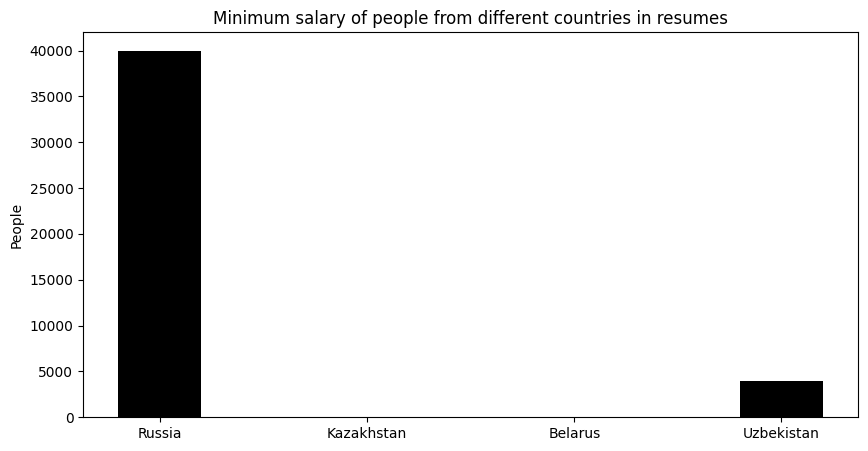

In [8]:
data = {'Russia':reader.loc[reader.citizenship=="Гражданство: Россия"].salary.min(),
       'Kazakhstan':reader.loc[reader.citizenship=="Гражданство: Казахстан"].salary.min(),
       'Belarus':reader.loc[reader.citizenship=="Гражданство: Беларусь"].salary.min(),
       'Uzbekistan':reader.loc[reader.citizenship=="Гражданство: Узбекистан"].salary.min()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
plt.bar(courses, values, color ='black',
        width = 0.4)
 

plt.ylabel("People")
plt.title("Minimum salary of people from different countries in resumes")
plt.show()

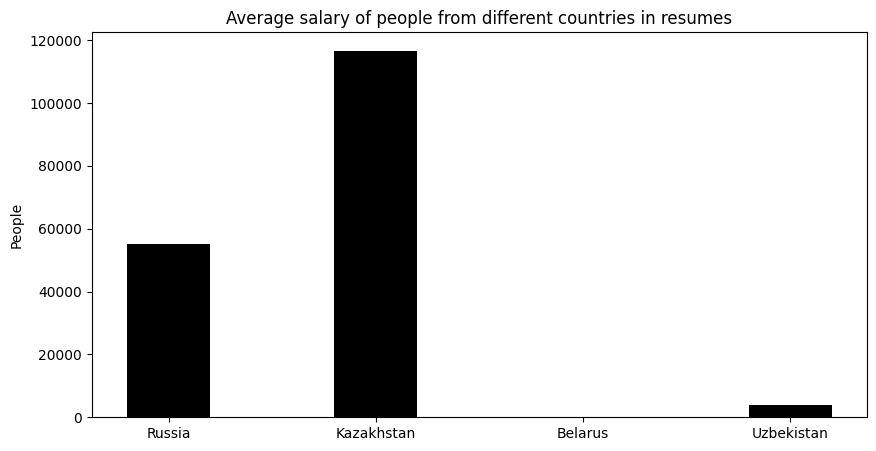

In [9]:
data = {'Russia':reader.loc[reader.citizenship=="Гражданство: Россия"].salary.mean(),
       'Kazakhstan':reader.loc[reader.citizenship=="Гражданство: Казахстан"].salary.mean(),
       'Belarus':reader.loc[reader.citizenship=="Гражданство: Беларусь"].salary.mean(),
       'Uzbekistan':reader.loc[reader.citizenship=="Гражданство: Узбекистан"].salary.mean()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
plt.bar(courses, values, color ='black',
        width = 0.4)
 

plt.ylabel("People")
plt.title("Average salary of people from different countries in resumes")
plt.show()

In [10]:
info=[["Male",reader.loc[reader.sex=="Мужчина"].salary.min(),
       reader.loc[reader.sex=="Мужчина"].salary.max(),
       reader.loc[reader.sex=="Мужчина"].salary.mean()],
       ["Female",reader.loc[reader.sex=="Женщина"].salary.min(),
        reader.loc[reader.sex=="Женщина"].salary.max(),
        reader.loc[reader.sex=="Женщина"].salary.mean()]]
daf = pandas.DataFrame(info, columns=['sex','Min', 'Max','Average'])
daf

,sex,Min,Max,Average
0,Male,0.0,500000.0,95777.777778
1,Female,NaN,NaN,NaN


In [11]:
reader.salary.min()

0

In [12]:
reader.salary.max()

500000

In [13]:
reader.salary.mean()

86200.0

In [14]:
reader

,name,salary,specialization,sex,age,experience,employment,citizenship
0,Программист Java,40000,"Программист, разработчик",Мужчина,38 лет,Опыт работы 1 год 10 месяцев,NaN,Гражданство: Россия
1,Java developer,0,"Программист, разработчик",Мужчина,NaN,Опыт работы 4 года,Занятость: полная занятость\nГрафик работы: по...,Гражданство: Казахстан
2,Java Developer,400000,"Программист, разработчик",Мужчина,22 года,Опыт работы 10 месяцев,NaN,Гражданство: Казахстан
3,Java Developer,60000,"Программист, разработчик",Мужчина,20 лет,Опыт работы 1 год 5 месяцев,NaN,"Гражданство: Молдавия, Россия"
4,Java Developer,500000,"Программист, разработчик",Мужчина,22 года,Опыт работы 1 год 3 месяца,NaN,Гражданство: Казахстан
5,Java Backend Developer,0,"Programmer, developer",Male,22 года,Work experience 1 year 5 months,"Employment: part time, project work, full time...",Citizenship: Kazakhstan
6,Backend разработчик(Java),0,"Программист, разработчик",Мужчина,21 год,Опыт работы 2 года 5 месяцев,"Занятость: стажировка, волонтерство, частичная...",Гражданство: Казахстан
7,Java-программист,4000,"Программист, разработчик",Мужчина,28 лет,Опыт работы 8 лет 5 месяцев,NaN,Гражданство: Узбекистан
8,Java-developer,70000,"Программист, разработчик",Мужчина,24 года,Опыт работы 1 год 5 месяцев,NaN,Гражданство: Россия
9,Java-разработчик,0,"Программист, разработчик",Мужчина,23 года,Опыт работы 1 год 6 месяцев,"Занятость: частичная занятость, полная занятос...",Гражданство: Казахстан
